Column Descriptions:

    id (Unique id for each patient)
    age (Age of the patient in years)
    origin (place of study)
    sex (Male/Female)
    cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    chol (serum cholesterol in mg/dl)
    fbs (if fasting blood sugar > 120 mg/dl)
    restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (True/ False)
    oldpeak: ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    ca: number of major vessels (0-3) colored by fluoroscopy
    thal: [normal; fixed defect; reversible defect]
    num: the predicted attribute


In [13]:
import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_csv('heart_disease_uci.csv')

In [15]:
df.shape

(920, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


With DataFrame.info(), we can see the different attributes in this data frame. We can see for instance, that the id attribute is an object and it will have string values. 

We can also observe that there are attributes with too many missing values. "ca" attribute only has 309/920 observations with data. 

In addition, the variable "dataset" contains information of the different institutions that collaborate to do this dataset. This variable does not give information about the diagnosis of the disease. Consequently, I will drop this attribute. 

In [17]:
df = df.drop(columns=['dataset'])

In [18]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Another important aspect is that "num" is the predicted atribute. 0 means that there is no disease and the person is healthy. And values > 0 are different stages of the disease. To simplify the task, I will distinguish between health (0) and with disease (1). I will also change the name of the column, to make it easier to identify that it is the diagnostic.

In [19]:
df = df.rename(columns={'num': 'diagnosis'})
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,diagnosis
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [27]:
df.loc[df['diagnosis'] > 0] = 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,diagnosis
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,1,1,1,1.0,1.0,1,1,1.0,1,1.0,1,1
2,1,1,1,1.0,1.0,1,1,1.0,1,1.0,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


I will drop the two columns with most of their data containing nan values.

In [20]:
df = df.drop(columns=['ca', 'thal', 'id'])

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,diagnosis
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [38]:
df.isna().sum()[df.isna().sum() > 0] # show nan of cols with nan

trestbps     20
chol         19
fbs          14
thalch       20
exang        20
oldpeak      21
slope       193
dtype: int64

In [23]:
set(df.slope)

{'downsloping', 'flat', nan, 'upsloping'}

But first, I will separate the data in order to divide the data into train and test datasets. 

### Train - Test Split

In [28]:
X = df.drop(columns=['diagnosis'])
y = df.diagnosis

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Data Cleaning

First, I will clean the attributes in the train dataset. The same principles followed here, will be implemented to clean the data in the test set.

In [35]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,1,1,1,1.0,1.0,1,1,1.0,1,1.0,1
457,54,Male,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN
797,1,1,1,1.0,1.0,1,1,1.0,1,1.0,1
25,50,Female,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat
84,52,Male,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping


In [37]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

trestbps     18
chol         15
fbs          14
thalch       18
exang        18
oldpeak      18
slope       150
dtype: int64

<AxesSubplot:>

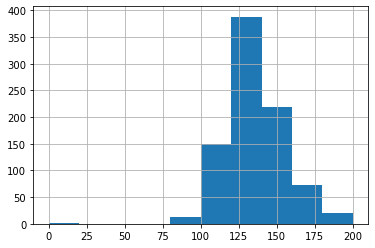

In [ ]:
df.trestbps.hist()